<a href="https://www.kaggle.com/code/anjusukumaran4/data-science-salaries-eda-seaborn?scriptVersionId=136157833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Salaries 2023 - Exploratory data analysis (EDA) using **Seaborn**.
## Seaborn is a Python data visualization library based on matplotlib. It helps you explore and understand your data.

In [1]:
#import libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### Load the Data

In [2]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

### Data Exploration

In [3]:
#first five rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Abbreviations SE : Senior, EN : Entry level, EX : Executive level, MI : Mid/Intermediate level, FL : Freelancer, CT : Contractor

In [4]:
# shape of dataframe
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Columns: {}'.format(df.shape[1]))

Number of Rows: 3755
Number of Columns: 11


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
#checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No null values in Data Science Salaries dataset

In [8]:
#for checking the unique values in a column
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [9]:
#replacing some values for better understanding
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

df['employment_type'] = df['employment_type'].replace('FL','Freelancer')
df['employment_type'] = df['employment_type'].replace('CT','Contractor')
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')


df['company_size'] = df['company_size'].replace('S','Small')
df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('L','Large')

In [10]:
#rename columns
df.rename(columns={'salary_in_usd':'Salary(USD)'},inplace = True)
df.rename(columns={'work_year':'Year'},inplace=True)
#drop unnecessary column
df.drop(['salary'], axis=1,inplace = True)
df.drop(['salary_currency'], axis=1,inplace = True)
df.drop(['remote_ratio'], axis=1,inplace = True)
df.drop(['employee_residence'], axis=1,inplace = True)

In [11]:
#final dataframe
df.head()

,Year,experience_level,employment_type,job_title,Salary(USD),company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,85847,ES,Large
1,2023,Mid-level/Intermediate,Contractor,ML Engineer,30000,US,Small
2,2023,Mid-level/Intermediate,Contractor,ML Engineer,25500,US,Small
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,CA,Medium
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,CA,Medium


## Data Exploration using Seaborn

### Top 10 jobs

In [12]:
top_10=df['job_title'].value_counts()[:10].rename_axis('job_title').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,job_title,count
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


<AxesSubplot:title={'center':'Top 10 jobs in 2023'}, xlabel='job_title', ylabel='count'>

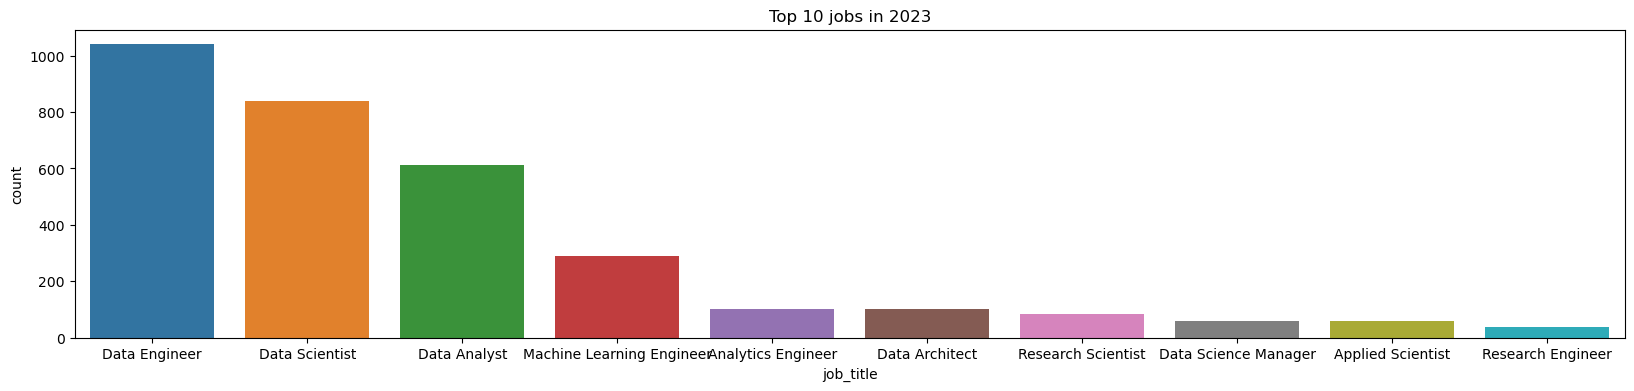

In [13]:
plt.figure(figsize=(20,4))   #Set the width and height of the figure
plt.title("Top 10 jobs in 2023")     #Add title

sns.barplot(x=top_10['job_title'], y=top_10['count'])

In [14]:
#to find the highest paid jobs in 2023
df1=df[df.Year==2023].sort_values(by='Salary(USD)', ascending=False,ignore_index=True)
df1.head()

,Year,experience_level,employment_type,job_title,Salary(USD),company_location,company_size
0,2023,Senior-level/Expert,Full-Time,AI Scientist,423834,IL,Large
1,2023,Senior-level/Expert,Full-Time,Data Analyst,385000,US,Medium
2,2023,Senior-level/Expert,Full-Time,Data Architect,376080,US,Medium
3,2023,Senior-level/Expert,Full-Time,Data Scientist,370000,US,Medium
4,2023,Senior-level/Expert,Full-Time,Research Scientist,370000,US,Medium


## Salaries based on features

### Experience level and Salary

<AxesSubplot:title={'center':'Experience level and Salary'}, xlabel='experience_level', ylabel='Salary(USD)'>

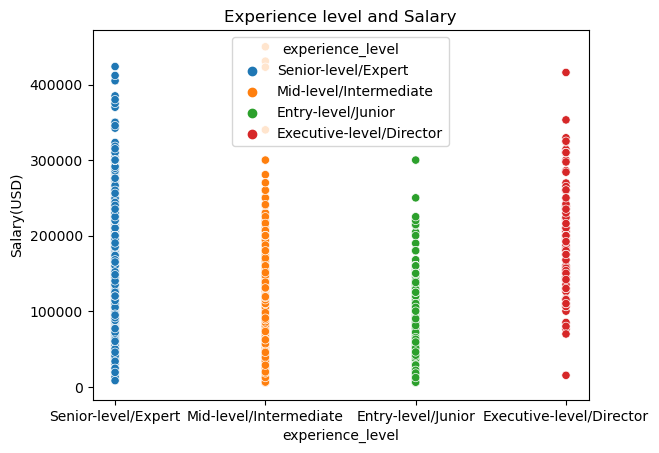

In [15]:
plt.title("Experience level and Salary")     #Add title

sns.scatterplot(x=df['experience_level'],y=df['Salary(USD)'],hue=df['experience_level'])

### Company size and Salary

<AxesSubplot:xlabel='company_size', ylabel='Salary(USD)'>

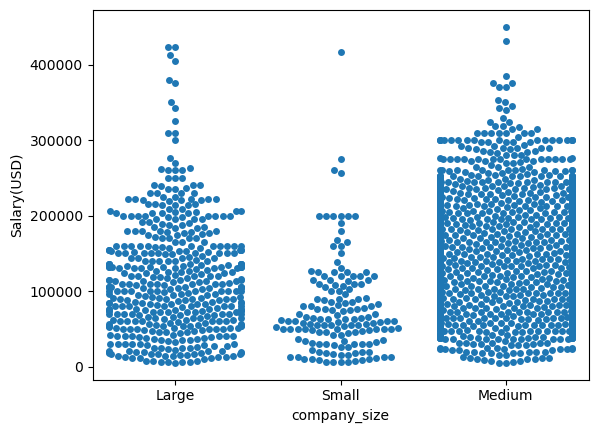

In [16]:
sns.swarmplot(x=df['company_size'],y=df['Salary(USD)']) 

### Average Salaries and different Features

In [17]:
#average salaries and company size
avg_salaries_based_oncompanysize=np.array(df['Salary(USD)'].groupby(df['company_size']).mean()).round(0)
avg_salaries_based_oncompanysize

array([118301., 143131.,  78227.])

<AxesSubplot:title={'center':'Average Salaries based on Company size'}, xlabel='Company size', ylabel='Salary(USD)'>

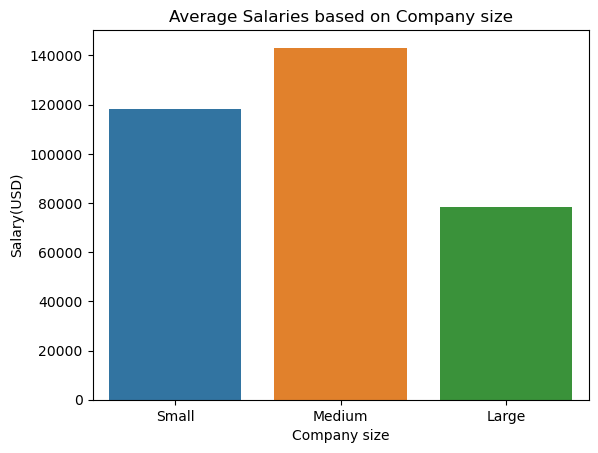

In [18]:
plt.title('Average Salaries based on Company size')
plt.xlabel('Company size')
plt.ylabel('Salary(USD)')

sns.barplot(x=['Small', 'Medium', 'Large'], y=avg_salaries_based_oncompanysize)

In [19]:
#average salaries and year
avg_salaries_based_onyear=np.array(df['Salary(USD)'].groupby(df['Year']).mean()).round()
avg_salaries_based_onyear

array([ 92303.,  94087., 133339., 149046.])

<AxesSubplot:title={'center':'Average Salaries based on Year'}, xlabel='Year', ylabel='Salary(USD)'>

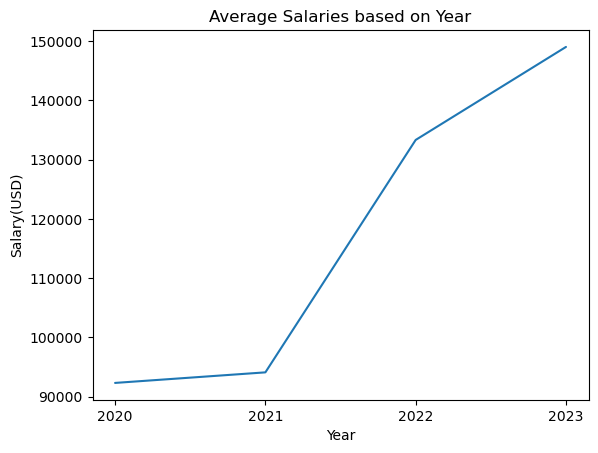

In [20]:
plt.title('Average Salaries based on Year')
plt.xlabel('Year')
plt.ylabel('Salary(USD)')
sns.set_style("darkgrid")    # to  change the style of the figure to the "dark" theme

sns.lineplot(x=['2020', '2021', '2022','2023'],y=avg_salaries_based_onyear)

It shows that as year passes the salaries are increasing

### Combining different features

In [21]:
#to find the total count of unique elements in the experience level column
df['experience_level'].value_counts()

Senior-level/Expert         2516
Mid-level/Intermediate       805
Entry-level/Junior           320
Executive-level/Director     114
Name: experience_level, dtype: int64

In [22]:
# to create a table with selected features for better understanding
df.groupby(['experience_level','Year','job_title']).mean().style.background_gradient(cmap='Greens')


From above table we can easly understand the relationship between the features - experience level, Year, job title with salary. Dark green indicates the hightest salary rates in each job title under year 2020, 2021, 2022, 2023.

<AxesSubplot:title={'center':'Confusion Matrix'}>

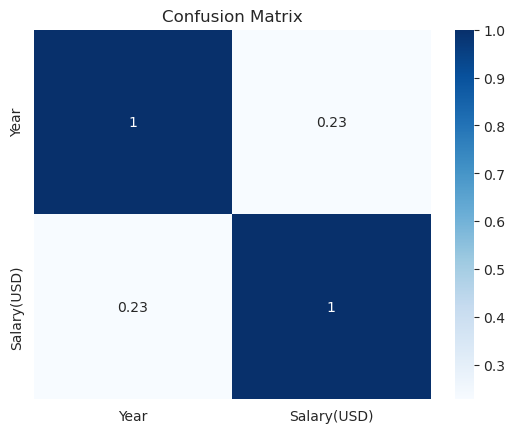

In [23]:
#heatmap of confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [24]:
m=df['Salary(USD)'].mean()
print('Average Salary: ',round(m,0),"(USD)")

Average Salary:  137570.0 (USD)


Data Science jobs are one of the highest-paying career with an average salary of 137570.0 (USD). From charts we can see that Data Science is a fast-booming multidisciplinary domain. The Data Science salaries may vary depending on skill set, years of experience, job profile, location, and the company. Technological advancements in recent years have increased the importance of Data Science across different fields of work, as year passes the salaries are increasing.